In [1]:
import numpy as np
import eko

# The renormalization group equation of PDFs: the DGLAP equation

Similar to the case of the strong coupling also the PDF obey an renormalization group equation: the DGLAP equation.
They can be obtained imposing that physical cross section does not depend on the (unphysical) factorization scale $\mu_F$. 
We can write them in their canonical form

$$
    \mu_F^2\frac{d}{d\mu_F^2} \mathbf{f}(x,\mu_F^2) = \left(\mathbf P(a_s(\mu_F^2)) \otimes \mathbf{f}(\mu_F^2)\right)(x) = 
        \int\limits_x^1\!\frac{dy}{y}\, \mathbf{P}(x/y,a_s(\mu_F^2)) \cdot \mathbf{f}(y,\mu_F^2)
$$

where the vector $\mathbf{f}$ is the PDF for all participating partons and $\mathbf P$ are the Altarelli-Parisi splitting functions.

Let's have a closer look to these equations (plural!):
- in the way we wrote it above they are [integro-differential equations](https://en.wikipedia.org/wiki/Integro-differential_equation), i.e. they contain both differentials (lhs) and integrals (rhs)
- they are coupled equations: $\mathbf f$ is a vector and $\mathbf P$ is matrix - in the following, we assume that they span a 14-dimensional space

Either of these two points is an essential problem in solving the DGLAP equations and we will have to tackle them in a moment.

## DGLAP in diagrams

Before diving into the complicated discussion, let's show some illustrative diagrams on DGLAP evolution first.
PDFs are connected to the collinear behaviour of the partons inside the proton and the DGLAP equations ensure that all partons are generated according to the
Altarelli-Parisi splitting functions, which can be derived from pQCD. Let's take an example from yesterday:

| NLO gluon diagram | quark-from-gluon splitting function | LO quark diagram |
| :-: | :-: | :-: |
| <img src="figures/cg.png" width=260 height=260 /> | <img src="figures/pqg.png" width=260 height=260 /> | <img src="figures/lo-light.png" width=260 height=260 /> |
| $ c_g^{(1)}(z) = 2 T_R n_f \left((2-4z(1-z)\ln((1-z)/z)) -2 +16z(1-z)\right) $ | $P_{q\leftarrow g}(z) = 2 T_R n_f \left(2-4z(1-z)\right)$ | $c_q^{(0)} = \delta(1-z)$ |

Yesterday, in our DIS calculation we saw the NLO gluon channel (the diagram on the left) and we had the NLO gluon coefficient function $c_g^{(1)}(z)$ which
describes the propability of the process to happen, whatever the configuration of the outgoing particles. While computing the coefficient functions we encountered the propagator in the middle of the diagram, which has a problem: it is
propotional to the inverse of $(k_1-p_2)^2$ and choosing a suitable reference frame we can write
$$t = (k_1-p_2)^2 \sim (1-\cos\theta)$$
where $\theta$ is the angle between $\vec p_2$ and $\vec k_1$. This propagator becomes singular if $t$ vanishes, which is the case for $\theta\to 0$, i.e. if $p_2$ and $k_1$ are collinear!

Now the statement is: in this limit, the collinear limit, we can predict exactly how that singularity arises (and, thus, we can subtract it).
The actual expression is
$$ \mathrm{Collinear\,limit\,of\,NLO} = (\mathrm{splitting\,functions}) \otimes \mathrm{LO} $$

The central argument is that splitting functions are **universal** and they can be computed perturbatively
$$ \mathbf{P}(z,a_s(\mu^2)) = \sum\limits_{j=0} a_s^{j+1}(\mu^2) \mathbf{P}^{(j)}(z) $$
e.g. from the diagram given above. The NNLO expression are given [here](https://inspirehep.net/literature/646539) and [here](https://inspirehep.net/literature/648209).

## Choosing a good representation 1: Mellin space

First, let's tackle the problem of the integral appearing on the rhs.

Remember the quantum mechanics lecture where it was convenient to choose the Fourier transform for solving the harmonic oscilator.
Here, we can do a similar trick: we can apply an integral transformation to simplify the equations - the Mellin transformation. It is defined by:
$$
    \tilde g(N) = \mathcal{M}[g(x)](N) = \int\limits_{0}^{1} x^{N-1} g(x)\,dx
$$
where now $N$ is a complex variable. We denote objects in Mellin-space with an additional tilde. As usual, we also need the inverse transformation and here, the inverse Mellin transformation requires an integration on the full complex plane and is given by:
$$
    g(x) = \mathcal{M}^{-1}[\tilde g(N)](x) = \frac{1}{2\pi i} \int\limits_{\mathcal{P}} x^{-N} \tilde g(N)\,dN
$$
for a suitable path $\mathcal{P}(t)$ which runs to the right to the right-most
pole of $\tilde g(N)$. 

In Mellin space the convolution becomes a simple product, thus, the DGLAP equation simplifies to:
$$ \mu_F^2\frac{d}{d\mu_F^2} \tilde{\mathbf{f}}(N,\mu_F^2) = -\gamma(N,a_s(\mu_F^2)) \cdot \tilde{\mathbf{f}}(N,\mu_F^2) $$
where we defined the so-called anomalous dimensions $\gamma(N) = -\mathcal{M}[\mathbf P](N)$ (so they are the Mellin transforms of the splitting functions).

**Excercise**: check that in Mellin space convolutions become ordinary products, i.e.
$$ \mathcal M[(f\otimes g)(x)](N) = \mathcal M[f(x)](N) \cdot \mathcal M[g(x)](N) $$

Both, the splitting functions $\mathbf P$ and the anomalous dimension $\gamma$ can contain specific physics features which exhibit clear signatures:
| | regular behaviour | soft radiation | high energy radiation |
| --: | :-: | :-: | :-: |
| example | <img src="figures/pqg.png" width=260 height=260 /> | <img src="figures/pqq.png" width=260 height=260 /> | <img src="figures/pgg.png" width=260 height=260 /> |
| $\mathbf P(z)$ | polynomial in $z$ | simple plus distribution $1/(1-z)_+$ | proportional $\ln^k(z)/z$ |
| $\gamma(N)$ | simple poles on the negative real axis | diverges logarithmically for large $N$ | a simple or higher poles at $N=1$ |

In [2]:
# let's show an example of a splitting function / anomalous dimension: P_qg vs γ_qg
from ekore.anomalous_dimensions.unpolarized.space_like.as1 import gamma_qg
from eko.constants import TR
from scipy.integrate import quad

NF = 3  # let's fix the number of flavors


def pqg(z: float, nf: int = NF) -> float:
    """Quark-from-gluon splitting function."""
    return 2.0 * TR * nf * (2.0 - 4.0 * z * (1.0 - z))


def mellin_qg(n: complex, nf: int = NF) -> complex:
    """Mellin transform of quark-from-gluon splitting function."""
    return quad(lambda z: z ** (n - 1.0) * pqg(z, nf), 0, 1)[0]


# check that in eko we're indeed using the Mellin transform
# remember the minus in the gamma definition
for n in [1.0, 2.0, 3.0]:
    np.testing.assert_allclose(-mellin_qg(n), gamma_qg(n, NF))

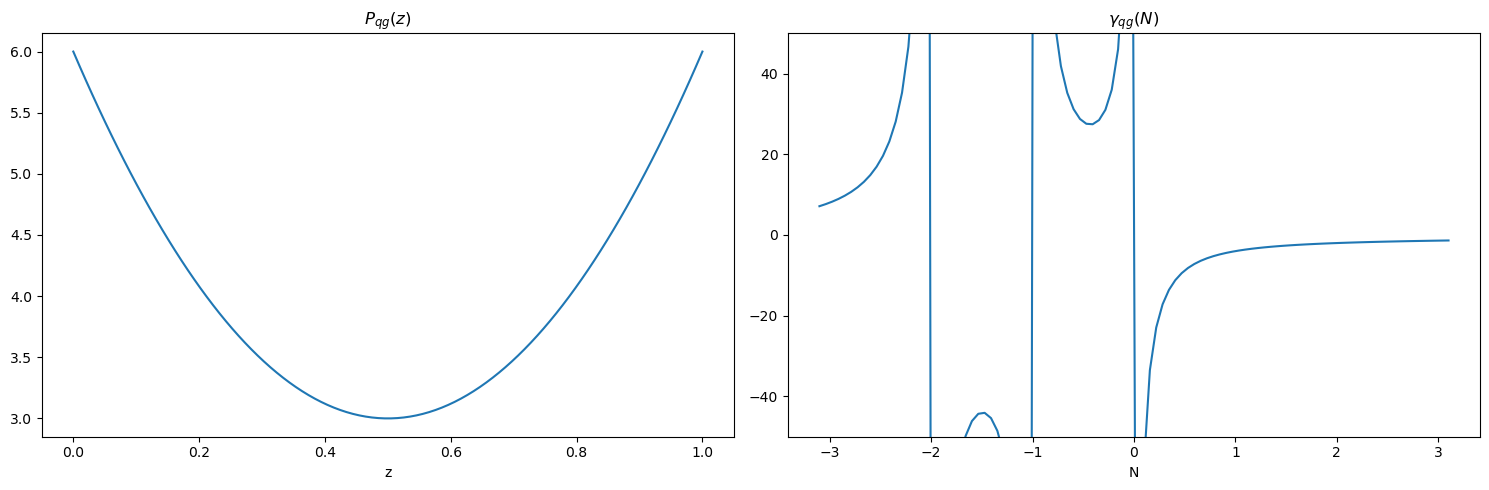

In [3]:
import matplotlib.pyplot as plt

# let's plot them in their respective space
plt.close()
fig, (ax0, ax1) = plt.subplots(
    1,
    2,
    figsize=(15, 5),
    clear=True,
    layout="tight",
)
# x-space
zs = np.linspace(0, 1, 100)
ax0.plot(zs, pqg(zs))
ax0.set_xlabel("z")
ax0.set_title(r"$P_{qg}(z)$")
# N-space
ns = np.linspace(-3.1, 3.1, 100)
ax1.plot(ns, [gamma_qg(n, NF) for n in ns])
ax1.set_xlabel("N")
ax1.set_title(r"$\gamma_{qg}(N)$")
ax1.set_ylim(-50, 50)
fig;

## Choosing a good representation 2: flavor space

Next, we need to tackle the fact that the simple equations we wrote in a naive way are actually part of a system of fully coupled equation.

To illustrate this, let's consider a simplified setup first: let's assume there was only the gluon and one quark species, e.g. the down quark.
Then, the splitting kernel would look like:

| | $d$ | $g$ | $\bar d$ |
| --: | :-: | :-: | :-: |
| $d$ | <img src="figures/pqq.png" width=260 height=260 /> | <img src="figures/pqg.png" width=260 height=260 /> | $O(g_s^2)$ |
| $g$ | <img src="figures/pgq.png" width=260 height=260 /> | <img src="figures/pgg.png" width=260 height=260 /> | <img src="figures/pgqbar.png" width=260 height=260 /> |
| $\bar d$ | $O(g_s^2)$ | <img src="figures/pqbarg.png" width=260 height=260 /> | <img src="figures/pqbarqbar.png" width=260 height=260 /> |

Now, after taking the modulus square, the direction of the fermion flow does not matter any longer and we get:
$$ \mathbf f_{fl} = \begin{pmatrix} d \\ g \\ \bar d \end{pmatrix}
\quad
\gamma_{fl} = \begin{pmatrix}
    \gamma_{dd}^{(0)} & \gamma_{dg}^{(0)} & 0\\
    \gamma_{gd}^{(0)} & \gamma_{gg}^{(0)} &  \gamma_{gd}^{(0)} \\
    0 &\gamma_{dg}^{(0)} & \gamma_{dd}^{(0)} \\
\end{pmatrix} $$
But now we can find easily a new basis in which we can at least decouple something, by rotating our old basis:
$$ \mathbf f_{ev} = \begin{pmatrix} d + \bar d \\ g \\ d -\bar d \end{pmatrix}
\quad
\gamma_{ev} = \begin{pmatrix}
    \gamma_{dd}^{(0)} & 2\gamma_{dg}^{(0)} & 0\\
    \gamma_{gd}^{(0)} & \gamma_{gg}^{(0)} & 0 \\
    0 & 0 & \gamma_{dd}^{(0)} \\
\end{pmatrix} $$
Of course the gluon couples just the same to a particle as to an anti-particle and so it does not couple at all to $d_v = d-\bar d$, which decouples this quantity.
We still have a coupled $2\times 2$ sector and that will remain - but no more than that.

We can repeat the same strategy for an arbitrary number of flavors (so not only one) and this yields the so called "evolution basis" (for more information see [here](https://eko.readthedocs.io/en/latest/theory/FlavorSpace.html)):
$$
\begin{aligned}
    \Sigma &= \sum\limits_{j}^6 q_j^+\\
    V &= \sum\limits_{j}^6 q_j^-\\
    V_3 &= u^- - d^-\\
    V_8 &= u^- + d^- - 2 s^-\\
    V_{15} &= u^- + d^- + s^- - 3 c^-\\
    V_{24} &= u^- + d^- + s^- + c^- - 4 b^-\\
    V_{35} &= u^- + d^- + s^- + c^- + b^- - 5 t^-\\
    T_3 &= u^+ - d^+\\
    T_8 &= u^+ + d^+ - 2 s^+\\
    T_{15} &= u^+ + d^+ + s^+ - 3 c^+\\
    T_{24} &= u^+ + d^+ + s^+ + c^+ - 4 b^+\\
    T_{35} &= u^+ + d^+ + s^+ + c^+ + b^+ - 5 t^+
\end{aligned}
$$
where we used the common abbreviations $q^\pm = q \pm \bar q$ and the fact that the gluon is flavor-blind.

In the end we can distinguish two sectors: the non-singlet sector, where equations completely decouple and we do not need to worry about matrices,
and the singlet sector, which couples the singlet $\Sigma$ and the gluon $g$ together.

The valence quarks $u_v = u^-$ and $d_v = d^-$ are of course the main building blocks of a proton: it has 2 up valence quarks and 1 down valence quark, or written in terms of equations:
$$ \int\limits_0^1 u_v(x,\mu_F^2) dx = 2 \quad \int\limits_0^1 d_v(x,\mu_F^2) dx = 1 $$

## Solving DLGAP in terms of evolution kernel operators

We arrived at
$$ \mu_F^2\frac{d}{d\mu_F^2} \tilde{\mathbf{f}}(N,\mu_F^2) = -\gamma(N,a_s(\mu_F^2)) \cdot \tilde{\mathbf{f}}(N,\mu_F^2)\quad, $$
but there is yet one more problem to solve: the scale dependence of the rhs is quite involved (and beyond LO not even analytically given).
To bypass this problem, we can do a change of variable using the (monotonic) strong coupling $a_s(\mu_F^2)$ and write:
$$
    \frac{d}{da_s} \tilde{\mathbf{f}}(a_s)
        = \frac{d\mu_F^2}{da_s} \cdot \frac{d \tilde{\mathbf{f}}(\mu_F^2)}{d\mu_F^2}
        = -\frac{\gamma(a_s)}{\beta(a_s)} \cdot \tilde{\mathbf{f}}(a_s)
$$

Finally, we can give a (formal) solution in terms of an Evolution Kernel Operator (EKO) $\mathbf E$:
$$
\begin{aligned}
    \tilde{\mathbf{f}}(a_s) &= \tilde{\mathbf{E}}(a_s \leftarrow a_s^0) \cdot \tilde{\mathbf{f}}(a_s^0) \\
    \tilde{\mathbf{E}}(a_s \leftarrow a_s^0) &= \mathcal P \exp\left[-\int\limits_{a_s^0}^{a_s} \frac{\gamma(a_s')}{\beta(a_s')} da_s' \right]
\end{aligned}
$$
with $\mathcal P$ the path-ordering operator as $\gamma$ may still be a matrix. Computing EKOs which is independent from the boundary condition is a good idea for PDF fitting, since we need to evolve the candidate PDFs many times.

In Mellin space the EKO is already fully independent from the boundary condition $\tilde{\mathbf{f}}(\mu_0^2)$, however in practice Mellin space
is not really usefull since you need to know the function over the full x domain. And moreover, usually PDFs are obtained and fitted in x space, so we should better do something.
Thus, the final step is to apply interpolation on both the initial and final PDF to obtain an EKO which is independent of the boundary condition also in x space.
In effect this means that we need the input at a given set of points and produce the output at a given set of points.

Now, we can write the solution to DGLAP as a true matrix operator and find:
$$ f_a^p(x_k,\mu^2) = E_{k,j}^{a,b}\left(a_s(\mu^2) \leftarrow a_s(\mu_0^2)\right) f_b^p(x_j,\mu_0^2) $$
so the EKO is a rank-4 tensor acting both in flavor and momentum fraction space.

## LO solution

At LO we have $\beta(a_s) = -\beta_0 a_s^2$ and $\gamma(a_s) = a_s \gamma^{(0)}$ and we can solve the integral inside the exponential in our master formula straight forward:
$$
    \ln \tilde {\mathbf E}^{(0)}(a_s \leftarrow a_s^0) = -\int\limits_{a_s^0}^{a_s} \frac{\gamma(a_s')}{\beta(a_s')} da_s' = \gamma^{(0)}\int\limits_{a_s^0}^{a_s} \frac{da_s'}{\beta_0 a_s'} = \gamma^{(0)} \cdot \frac{\ln(a_s/a_s^0)}{\beta_0}
$$
and we don't need to worry about the path-ordering, since there is at most 1 matrix involved, which always commutes with itself.


### Non-singlet sector

In the non-singlet sector all equations decouple and we do not need to worry about matrices. For our master formula we find:
$$ \frac{d}{da_s} \tilde f_{ns}^{(0)}(a_s) = \frac{\gamma_{ns}^{(0)}}{\beta_0 a_s}  \cdot \tilde f_{ns}^{(0)}(a_s) $$
and, thus, the EKO is then given by a simple exponential:
$$ \tilde E^{(0)}_{ns}(a_s \leftarrow a_s^0) = \exp\left[\gamma_{ns}^{(0)} \ln(a_s/a_s^0)/\beta_0 \right] = \left(\frac{a_s}{a_s^0}\right)^{\gamma_{ns}/\beta_0} $$
where now the name "anomalous dimensions" becomes obvious.

All in all, a non-singlet PDF at an arbitrary scale $\mu^2$ is computed from the boundary condition at $\mu_0^2$ by
$$ f_{ns}(x,\mu^2) = \mathcal M^{-1}\left[\exp\left(\gamma_{ns}^{(0)}(N) \ln(a_s(\mu^2)/a_s(\mu_0^2))/\beta_0  \right) \mathcal M\left[f_{ns}(y,\mu_0^2)\right](N) \right](x) $$

### Singlet sector

In the singlet sector we have the singlet $\Sigma$ and gluon $g$ PDFs and we need to solve a coupled system of equations:

$$
    \frac{d}{da_s} \begin{pmatrix}\tilde \Sigma\\\tilde g \end{pmatrix} =  \frac{\gamma_S^{(0)}}{\beta_0 a_s} \begin{pmatrix} \tilde \Sigma\\ \tilde g \end{pmatrix}
       = \frac{1}{\beta_0 a_s} \begin{pmatrix}
                                \gamma_{qq}^{(0)} & \gamma_{qg}^{(0)}\\
                                \gamma_{gq}^{(0)} & \gamma_{gg}^{(0)}
                            \end{pmatrix} \begin{pmatrix} \tilde \Sigma\\ \tilde g \end{pmatrix}
$$

In order to exponentiate the EKO, we need to diagonalize the anomalous dimension $\gamma_S^{(0)}$ and only then the exponentiation becomes easier again.

## All the other complications

The additional complications we discussed for the strong coupling are also present for DGLAP:
- DGLAP also defines a resummation: we have to sum all terms $\left(a_s(\mu_0^2) \log(\mu^2/\mu_0^2)\right)^k$ for a true solution
- the DGLAP equations hold for a fixed flavor scheme with a fixed number of quarks active. In case of a variable flavor scheme we may need to apply matching conditions when crossing a heavy flavor thresholds.
- at higher orders the analytical solutions become more complicated and as before many solution strategies become available. You can have a look [here](https://eko.readthedocs.io/en/latest/theory/DGLAP.html) for the full documentation up to N3LO

# Computing an EKO

We develop the [eko](https://github.com/NNPDF/eko) library to solve DGLAP - let's use it!

By design, `eko` follows a "no default" approach, so the user has to spell out all the relevant options in order to start a calculation, and no sensible defaults are applied by the program itself.
This is done in order to reduce the amount of unexpected behavior, that can result in unpredictable behaviour and is difficult to debug differences for the end user.

In order to avoid surprises, please take care to review your choices, and their meaning.

In this example, we are going to use some runcards internally used for debugging. The options in there are in no way better than any other.
For the calculation you are going to run, you are expected to know which are the appropriate values. In case of doubts, read the [docs](https://eko.readthedocs.io/)

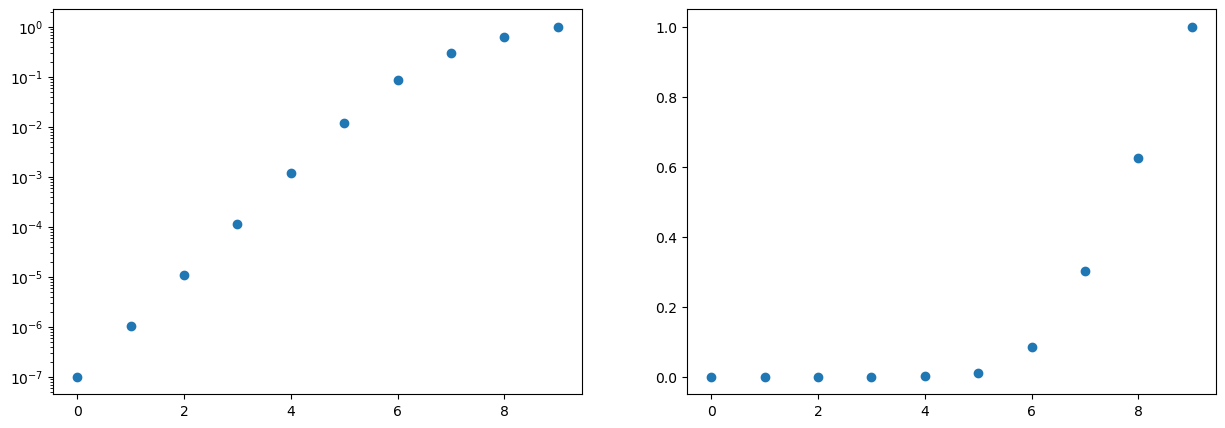

In [4]:
from ekobox.cards import example
from eko.interpolation import lambertgrid

th_card = example.theory()
op_card = example.operator()
# eko is applying an interpolation and so we need to choose an interpolation grid!
# The size and distributions will largely determine how accurate the result is.
# Here, we choose a small one, to speed up the example
op_card.xgrid = lambertgrid(10)
# lambertgrid provides a suitable distribution of points
# we want something that is logarithmic at small x and linear at large x
plt.close()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.plot(op_card.xgrid, "o")
ax0.set_yscale("log")
ax1.plot(op_card.xgrid, "o")
fig;

Before starting, let's have a look to these cards.

In [5]:
th_card.raw

{'order': [1, 0],
 'couplings': {'alphas': 0.118,
  'alphaem': 0.007496252,
  'scale': 91.2,
  'max_num_flavs': 6,
  'num_flavs_ref': 5,
  'em_running': False},
 'heavy': {'num_flavs_init': 4,
  'num_flavs_max_pdf': 6,
  'intrinsic_flavors': [4],
  'masses': [[2.0, nan], [4.5, nan], [173.07, nan]],
  'masses_scheme': 'pole',
  'matching_ratios': [1.0, 1.0, 1.0]},
 'xif': 1.0,
 'n3lo_ad_variation': [0, 0, 0, 0, 0, 0, 0],
 'use_fhmruvv': False,
 'matching_order': [0, 0]}

In [6]:
op_card.raw

{'mu0': 1.65,
 'mugrid': [[100.0, 5]],
 'xgrid': [9.999999999999984e-08,
  1.0448415003131721e-06,
  1.0916450353829785e-05,
  0.00011400136824643283,
  0.0011847790480690361,
  0.011742588430938065,
  0.08504408706248985,
  0.30132870600293005,
  0.624780102179027,
  1.0],
 'configs': {'evolution_method': 'iterate-exact',
  'ev_op_max_order': [10, 0],
  'ev_op_iterations': 10,
  'scvar_method': None,
  'inversion_method': None,
  'interpolation_polynomial_degree': 4,
  'interpolation_is_log': True,
  'polarized': False,
  'time_like': False,
  'n_integration_cores': 0},
 'debug': {'skip_singlet': False, 'skip_non_singlet': False},
 'eko_version': '0.14.6'}

And now, let's run our first `eko` calculation:

In [16]:
import pathlib

# We need a place where to store the eko (note that in practice in can become (very) large)
path = pathlib.Path("./myeko.tar")
path.unlink(missing_ok=True)
# do it!
eko.solve(th_card, op_card, path)

You have just run your first DGLAP calculation!

### Exploring the output

Now, let's inspect the content of the operator: e.g. you can extract the theory and operator card

In [17]:
# open the file with a context manager ...
with eko.EKO.read(path) as evolution_operators:
    # obtain theory card
    print(evolution_operators.theory_card)
    # or operator card
    print(evolution_operators.operator_card)

TheoryCard(order=(1, 0), couplings=CouplingsInfo(alphas=0.118, alphaem=0.007496252, scale=91.2, max_num_flavs=6, num_flavs_ref=5, em_running=False), heavy=HeavyInfo(num_flavs_init=4, num_flavs_max_pdf=6, intrinsic_flavors=[4, 5, 6], masses=[[2.0, nan], [4.5, nan], [173.07, nan]], masses_scheme=<QuarkMassScheme.POLE: 'pole'>, matching_ratios=[1.0, 1.0, 1.0]), xif=1.0, n3lo_ad_variation=(0, 0, 0, 0, 0, 0, 0), use_fhmruvv=False, matching_order=(0, 0))
OperatorCard(mu0=1.65, mugrid=[(100.0, 5)], xgrid=<eko.interpolation.XGrid object at 0x131491490>, configs=Configs(evolution_method=<EvolutionMethod.ITERATE_EXACT: 'iterate-exact'>, ev_op_max_order=(10, 0), ev_op_iterations=10, scvar_method=None, inversion_method=None, interpolation_polynomial_degree=4, interpolation_is_log=True, polarized=False, time_like=False, n_integration_cores=0), debug=Debug(skip_singlet=False, skip_non_singlet=False), eko_version='0.14.6')


Let's first find out again which final scales we have computed:

In [18]:
with eko.EKO.read(path) as evolution_operators:
    print(evolution_operators.evolgrid)

[(10000.0, 5)]


Remember that the unique starting scale is $Q_0^2$. In the present case there is a unique final scale, but in the general one there might be many.
Now, let's use this operator! The recommended way to load an operator is by using again a context manager:

In [19]:
with eko.EKO.read(path) as evolution_operators:
    # load an operator
    with evolution_operators.operator((10000.0, 5)) as op:
        # as the thing is big, let's only print the shape
        print(f"operator shape: {op.operator.shape}")
    # print the respective indices
    print("flavors are given by pids and momentum fraction by xgrid:")
    print(f"pids: {evolution_operators.bases.pids}")
    print(f"xgrid: {evolution_operators.bases.xgrid.raw}")

operator shape: (14, 10, 14, 10)
flavors are given by pids and momentum fraction by xgrid:
pids: [22 -6 -5 -4 -3 -2 -1 21  1  2  3  4  5  6]
xgrid: [1.00000000e-07 1.04484150e-06 1.09164504e-05 1.14001368e-04
 1.18477905e-03 1.17425884e-02 8.50440871e-02 3.01328706e-01
 6.24780102e-01 1.00000000e+00]


This is the final product we expected from the beginning: the evolution operator, delivered as a rank 4 numerical array.
The  dimensions are `(flavor_out, x_out, flavor_in, x_in)` as required from our formula:
$$ f_a^p(x_k,\mu^2) = E_{k,j}^{a,b}(a_s(\mu^2) \leftarrow a_s(\mu_0^2)) f_b^p(x_j,\mu_0^2) $$

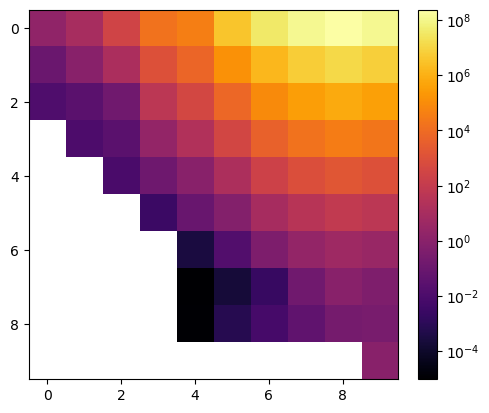

In [21]:
# Let's plot a single EKO - e.g. the gluon-from-gluon operator
ggop = None
g_index = 7  # the gluon is at index 7
# load the operator
with eko.EKO.read(path) as evolution_operators:
    # check we are looking indeed at the gluon
    assert evolution_operators.bases.pids[g_index] == 21
    with evolution_operators.operator((10000.0, 5)) as op:
        ggop = op.operator[g_index, :, g_index, :]  # recall the indices order
# plot it
plt.close()
fig, ax = plt.subplots(1, 1)
im = plt.imshow(np.abs(ggop), cmap="inferno", norm="log", aspect="equal")
fig.colorbar(im, ax=ax, fraction=0.1, pad=0.04)
fig;

- The almost triangular shape is due to the form of the DGLAP equations:
  $$
    \mu_F^2\frac{d}{d\mu_F^2} \mathbf{f}(x,\mu_F^2) = \left(\mathbf P(a_s(\mu_F^2)) \otimes \mathbf{f}(\mu_F^2)\right)(x) = 
        \int\limits_x^1\!\frac{dy}{y}\, \mathbf{P}(x/y,a_s(\mu_F^2)) \cdot \mathbf{f}(y,\mu_F^2)
  $$
  We see that to the PDF at $x$ only the information between $x$ and 1 can contribute - this results in a triangle.
- We see a big rise for the gluon at small x - the bright region in the top row

We are now able to evolve PDFs - let's have a look to some PDF features next!